<a href="https://colab.research.google.com/github/Nimo160302/Deep_Learning_Codes/blob/main/simple_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Practical Assignment – RNN for Temperature Prediction
Total Marks: 10
Level: Beginner (Post First RNN Session)
Dataset: Daily Climate Time Series Data – KaggleLinks to an external site.

Column to Predict: MeanTemp

Objective:
Use Recurrent Neural Networks (RNN) to learn patterns in daily temperature data and predict the next day’s mean temperature based on the last 30 days.

Tasks & Marking Scheme
1. Load & Inspect Data (1 Mark)
Load the dataset using Pandas

Display information of the data.

Plot the MeanTemp column over time using matplotlib

Marks:

0.5 for correct loading

0.5 for visualization

2. Preprocess the Data (2 Marks)
Extract the MeanTemp column

Normalize it using MinMaxScaler

Plot before and after normalization

Marks:

1 for clean extraction and scaling

1 for plotting and comparison

3. Create Sequences for Prediction (2 Marks)
Write a function create_sequences(data, seq_length=30)

Split data into x and y, where x has 30 steps and y is the next value

Reshape x to shape (samples, 30, 1)

Marks:

1.5 for working function and correct shapes

0.5 for clear code explanation

4. Build & Compile an RNN Model (2 Marks)
Build a model using:

SimpleRNN(units=50, return_sequences=False)

Dense(1) output layer

Compile with mean_squared_error loss and adam optimizer

Print model summary

Marks:

1 for correct architecture

1 for compilation and summary

5. Train the Model & Visualize Loss (1.5 Marks)
Train the model for 10 epochs with batch_size=32

Use validation_split=0.2

Plot training and validation loss

Marks:

1 for training

0.5 for loss plot

6. Evaluate Model & Plot Predictions (1.5 Marks)
Predict on the test set

Inverse transform the predicted and true values

Plot predicted vs actual temperatures (first 50 points)

Marks:

0.5 for prediction code

1 for correct and labeled plot

Load & Inspect Data (1 Mark) Load the dataset using Pandas
Display information of the data.

Plot the MeanTemp column over time using matplotlib

Marks:

0.5 for correct loading

0.5 for visualization

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('/content/DailyDelhiClimateTrain.csv')

In [5]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [30]:
mean_temp = df['meantemp'].values
df['date'] = pd.to_datetime(df['date'])
date = df['date'].values

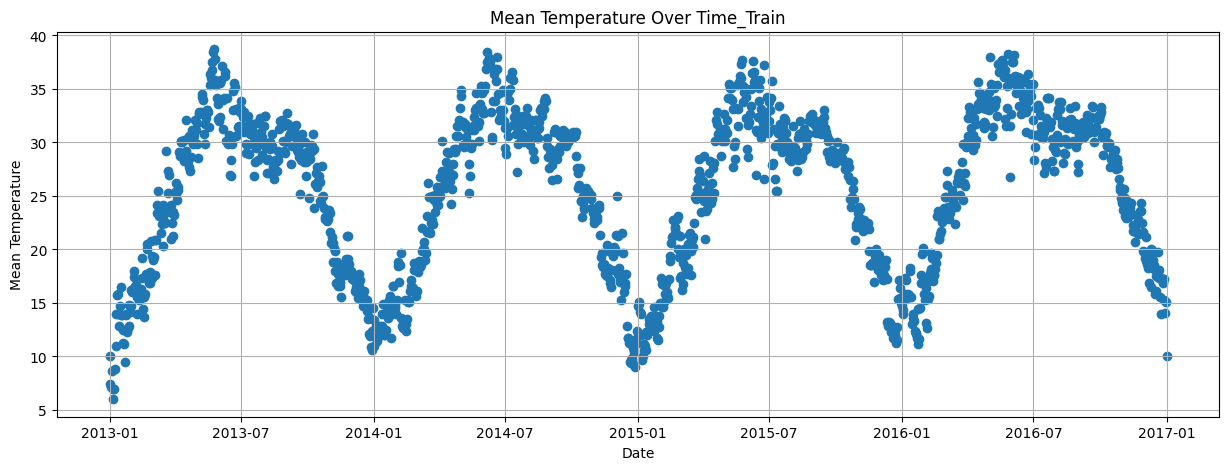

In [50]:
plt.figure(figsize=(15, 5))
plt.scatter(x=  date ,y = mean_temp)
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.title('Mean Temperature Over Time_Train')
plt.grid(True)

Preprocess the Data (2 Marks) Extract the MeanTemp column
Normalize it using MinMaxScaler

Plot before and after normalization

Marks:

1 for clean extraction and scaling

1 for plotting and comparison

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
mm = MinMaxScaler()
mean_temp_norm = mm.fit_transform(mean_temp.reshape(-1, 1))

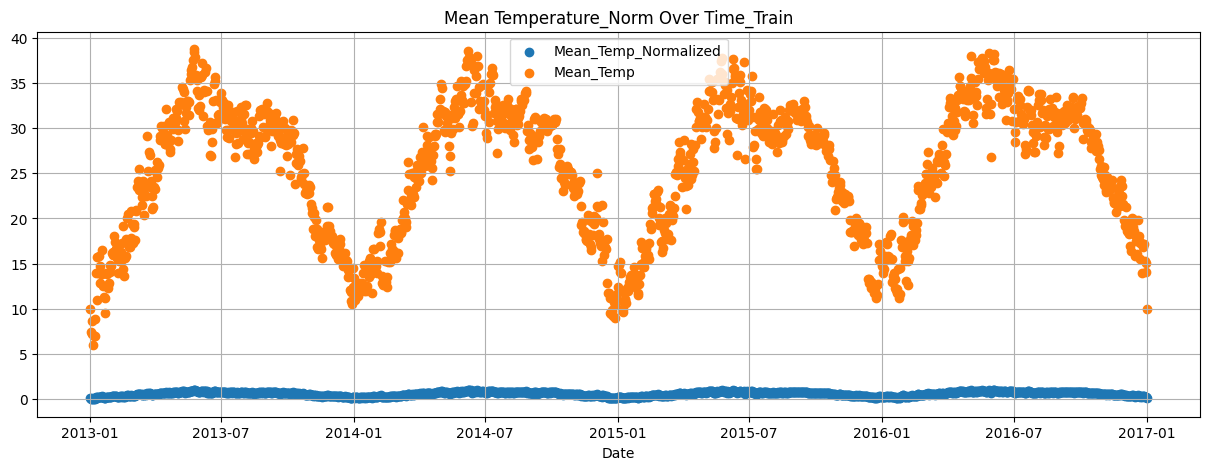

In [48]:
plt.figure(figsize=(15, 5))
plt.scatter(x= date , y = mean_temp_norm , label  = 'Mean_Temp_Normalized')
plt.scatter(x =  date, y= mean_temp, label = 'Mean_Temp')
plt.legend()
plt.xlabel('Date')
plt.title('Mean Temperature_Norm Over Time_Train')
plt.grid(True)




Create Sequences for Prediction (2 Marks) Write a function create_sequences(data, seq_length=30)
Split data into x and y, where x has 30 steps and y is the next value

Reshape x to shape (samples, 30, 1)

Marks:

1.5 for working function and correct shapes

0.5 for clear code explanation

In [51]:
def  create_sequences(data, seq_length=30):
  x =[]
  y =[]

  for i in range(seq_length, len(data)):
        x.append(data[i-seq_length:i])   # 30 previous values
        y.append(data[i])                # 31st value to predict

  x = np.array(x)
  y = np.array(y)

  # Reshape x to (samples, 30, 1)
  x = x.reshape((x.shape[0], x.shape[1], 1))

  return x, y

In [53]:
# Create sequences from normalized temperature data
x, y = create_sequences(mean_temp_norm, seq_length=30)

# Display shapes
print("x shape:", x.shape)  # Expected: (samples, 30, 1)
print("y shape:", y.shape)  # Expected: (samples,)


x shape: (1432, 30, 1)
y shape: (1432, 1)


Build & Compile an RNN Model (2 Marks) Build a model using:
SimpleRNN(units=50, return_sequences=False)

Dense(1) output layer

Compile with mean_squared_error loss and adam optimizer

Print model summary

Marks:

1 for correct architecture

1 for compilation and summary

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense


model =  Sequential(
    [
        SimpleRNN(units=50, return_sequences=False, input_shape = (30,1)),
        Dense(1)
    ]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [57]:
model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

Train the Model & Visualize Loss (1.5 Marks) Train the model for 10 epochs with batch_size=32
Use validation_split=0.2

Plot training and validation loss

Marks:

1 for training

0.5 for loss plot



In [58]:
history = model.fit(
    x, y, epochs = 10 , batch_size=32, validation_split=0.2
)

Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2142 - val_loss: 0.0137
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0144 - val_loss: 0.0109
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0108 - val_loss: 0.0083
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0088 - val_loss: 0.0076
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0088 - val_loss: 0.0084
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0069 - val_loss: 0.0073
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0067 - val_loss: 0.0057
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0061 - val_loss: 0.0054
Epoch 9/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0055 - val_loss: 0.0051
Epoch 10/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - val_loss: 0.0069


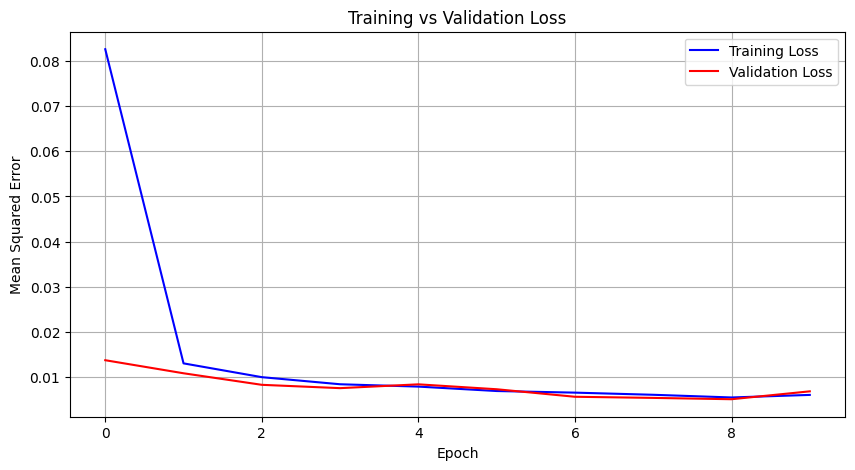

In [59]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

Evaluate Model & Plot Predictions (1.5 Marks) Predict on the test set
Inverse transform the predicted and true values

Plot predicted vs actual temperatures (first 50 points)

Marks:

0.5 for prediction code

1 for correct and labeled plot

In [67]:
df_test =  pd.read_csv('/content/DailyDelhiClimateTest.csv')

In [68]:
mean_temp_test =  df_test['meantemp'].values

In [69]:
mean_temp_test_norm  =  mm.transform(mean_temp_test.reshape(-1,1))

In [71]:
x_test, y_test = create_sequences(mean_temp_test_norm, seq_length=30)

In [72]:
y_pred = model.predict(x_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


In [75]:
y_pred_inv = mm.inverse_transform(y_pred)
y_test_inv = mm.inverse_transform(y_test.reshape(-1,1))


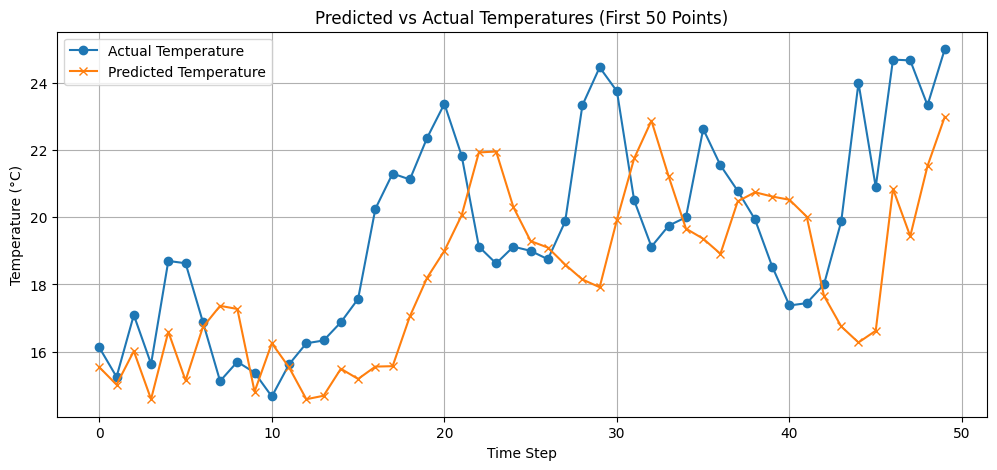

In [76]:
plt.figure(figsize=(12, 5))
plt.plot(y_test_inv[:50], label='Actual Temperature', marker='o')
plt.plot(y_pred_inv[:50], label='Predicted Temperature', marker='x')
plt.title('Predicted vs Actual Temperatures (First 50 Points)')
plt.xlabel('Time Step')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()